In [2]:
import patchseq_utils.analysis as utils
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('use_inf_as_na', True)
pd.options.display.max_columns=300
pd.options.display.max_rows=300
sns.set(style='ticks', context='talk')
from importlib import reload

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [40]:
reload(ps)
reload(plot)

<module 'patchseq_utils.plotting' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/plotting.py'>

In [3]:
import patchseq_utils.plot.morphology as pm
import patchseq_utils.plot.sweeps as ps

In [4]:
from patchseq_utils import l1_load, util, plotting as plot
from importlib import reload
reload(l1_load)
reload(util)

/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/l1_load.py:128: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  human_df['primary_ephys'] = human_df.eval('collaborator=="AIBS" & failed_fx_long_squares==False')
/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/l1_load.py:128: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  human_df['primary_ephys'] = human_df.eval('collaborator=="AIBS" & failed_fx_long_squares==False')


<module 'patchseq_utils.util' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py'>

In [5]:
from patchseq_utils.l1_load import *
from patchseq_utils.util import *

In [6]:
human_df['axon_branch_freq'] = human_df['axon_num_branches']/human_df['axon_total_length']*100
mouse_df.loc[lambda df: df.sag>0.5, 'sag'] = np.nan
human_ephys = human_df.query("collaborator=='AIBS'")

## Features

In [122]:
features = [
       'sag',
       'ir_late_mean',
]
labels = [
    'sag ratio',
    'irregularity ratio',
]

In [130]:
reload(utils)

<module 'patchseq_utils.analysis' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/analysis.py'>

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


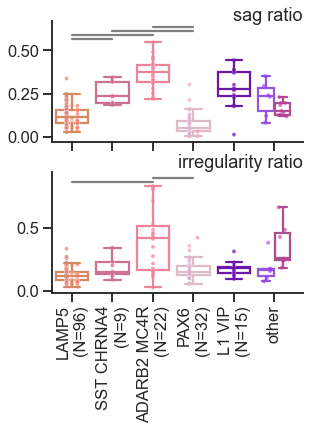

In [131]:
df = human_df.query('primary_ephys').copy()
subclass = df['homology_type']=='MC4R'
df['homology_type'] = df['homology_type'].astype(str)
df.loc[subclass, 'homology_type'] = df.loc[subclass, cluster]
df['homology_type'] = df['homology_type'].astype(
    CategoricalDtype(categories=['LAMP5','SST CHRNA4', 'ADARB2 MC4R','PAX6','L1 VIP','other'], 
                     ordered=True))
pairs = [(x, y) for x in ['LAMP5','PAX6','L1 VIP'] 
         for y in ['SST CHRNA4', 'ADARB2 MC4R']] + [('SST CHRNA4', 'ADARB2 MC4R')]

palette = palette_subclass
palette.update(palette_human)
utils.plot_boxplot_multiple(
    df, features, labels=labels, x='homology_type', palette_fine=palette_human, palette=palette,
    plot_function=plot.plot_subclass_focus, subclasses=['other'], label_counts=True,
    pairs=pairs, test='dunn', drop_box='other', figsize=(4.5,5))
save_plot_multiple(figdir/"f4_boxplots_rosehip_ephys", ['svg'])

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_h

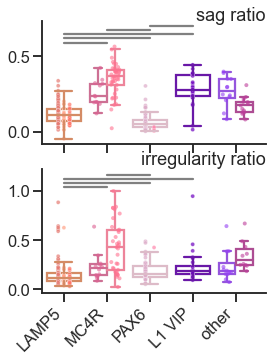

In [8]:
utils.plot_boxplot_multiple(
    human_df, features, labels=labels, x='homology_type', palette_fine=palette_human, palette=palette_subclass,
    plot_function=plot.plot_subclass_focus, subclasses=['other', 'MC4R'], label_counts=False,
    pairs=pairs, test='dunn', drop_box='other', figsize=(4,5))

In [132]:
features = [
    'axon_extent_x',
    'axon_branch_freq'
]
labels = [
    'axon horiz. extent (μm)',
    'axon branch freq (per 100 μm)',
]
# labels=features
# util.plot_boxplot_multiple(human_df, features, labels=labels, x=cluster, figsize=(4,5), 
#                            palette=palette_human, label_counts=False)

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


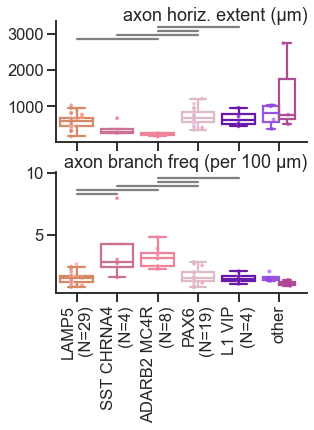

In [133]:
df = human_df.copy()
subclass = df['homology_type']=='MC4R'
df['homology_type'] = df['homology_type'].astype(str)
df.loc[subclass, 'homology_type'] = df.loc[subclass, cluster]
df['homology_type'] = df['homology_type'].astype(
    CategoricalDtype(categories=['LAMP5','SST CHRNA4', 'ADARB2 MC4R','PAX6','L1 VIP','other'], 
                     ordered=True))
pairs = [(x, y) for x in ['LAMP5','PAX6','L1 VIP'] 
         for y in ['SST CHRNA4', 'ADARB2 MC4R']] + [('SST CHRNA4', 'ADARB2 MC4R')]

palette = palette_subclass
palette.update(palette_human)
utils.plot_boxplot_multiple(
    df, features, labels=labels, x='homology_type', palette_fine=palette_human, palette=palette,
    plot_function=plot.plot_subclass_focus, subclasses=['other'], label_counts=True,
    pairs=pairs, test='dunn', drop_box='other', figsize=(4.5,5))
save_plot_multiple(figdir/"f4_boxplots_rosehip_morph", ['svg'])

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


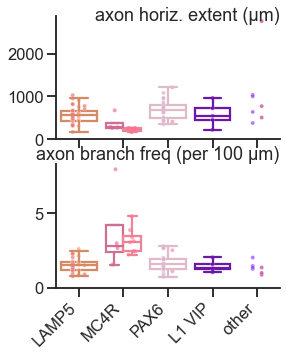

In [54]:
utils.plot_boxplot_multiple(human_df, features, labels=labels, x='homology_type', figsize=(4,5), pad_title=-5,
                        plot_function=plot.plot_subclass_focus, subclasses=['MC4R'])

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_h

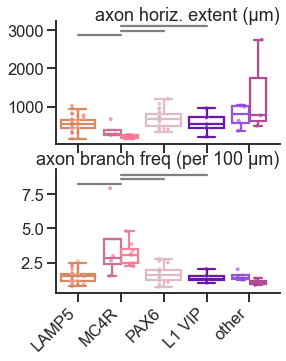

In [55]:
utils.plot_boxplot_multiple(
    human_df, features, labels=labels, x='homology_type', palette_fine=palette_human, palette=palette_subclass,
    plot_function=plot.plot_subclass_focus, subclasses=['other', 'MC4R'], label_counts=False,
    pairs=pairs, test='dunn', drop_box='other', figsize=(4,5))

### original paper quant. comparison

/local1/storage/envs/ipfx3/lib/python3.7/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/local1/storage/envs/ipfx3/lib/python3.7/site-packages/pandas/core/dtypes/missing.py:277: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  vec = libmissing.isnaobj_old(values.ravel())
/local1/storage/envs/ipfx3/lib/python3.7/site-packages/pandas/core/dtypes/missing.py:277: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  vec = libmissing.isnaobj_old(values.ravel())
/local1/storage/envs/ipfx3/lib/python3.7/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


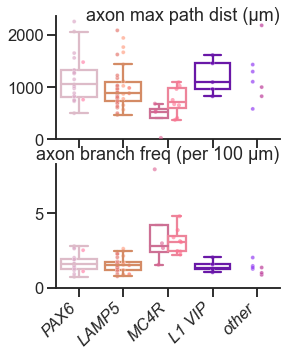

In [10]:

features = [
    'axon_max_path_distance',
    'axon_branch_freq'
]
labels = [
    'axon max path dist (μm)',
    'axon branch freq (per 100 μm)',
]
# labels=features
# util.plot_boxplot_multiple(human_df, features, labels=labels, x=cluster, figsize=(4,5), 
#                            palette=palette_human, label_counts=False)
utils.plot_boxplot_multiple(human_df, features, labels=labels, x='homology_type', figsize=(4,5), pad_title=-5,
                        plot_function=plot.plot_subclass_focus, subclass='MC4R')

/local1/storage/envs/ipfx3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


(1.0, 1.5)

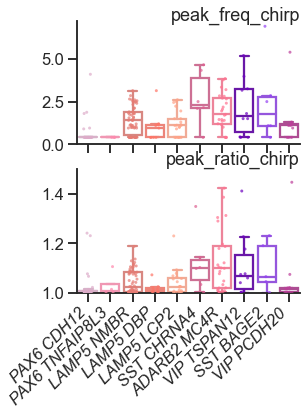

In [38]:
human_df['peak_freq_chirp'].loc[lambda x: x>10] = np.nan
human_df['peak_ratio_chirp'].loc[lambda x: x>1.50] = np.nan
features = [
    'peak_freq_chirp',
    'peak_ratio_chirp'
]
labels = features
util.plot_boxplot_multiple(human_df, features, labels=labels, x=cluster, figsize=(4,5), 
                           palette=palette_human, label_counts=False)
plt.ylim(1,1.5)

In [26]:
reload(plot)

<module 'patchseq_utils.plotting' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/plotting.py'>

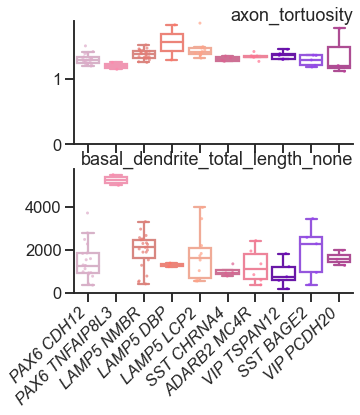

In [14]:
human_df['axon_tortuosity'] = 1/human_df['axon_contraction']
features = [
    'axon_tortuosity', 
    'basal_dendrite_total_length'
           ]
util.plot_boxplot_multiple(human_df, features, labels=None, x=cluster, figsize=(5,5), 
                           palette=palette_human, label_counts=False)

In [15]:
human_df.loc[lambda df: df['topLeaf'].str.contains('MC4R'), 'axon_branch_freq'].describe()

count    6.000000
mean     3.667915
std      0.823601
min      2.422567
25%      3.246788
50%      3.868187
75%      3.981076
max      4.790191
Name: axon_branch_freq, dtype: float64

## human examples

In [30]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [37]:
cells = human_df.loc[lambda df: ~df['topLeaf'].str.contains('MC4R') & (df['axon_branch_freq'] > 2.8)]
cols = ['name', 'topLeaf', 'topLeafValue', 'Tree_second_cl', 'Tree_second_bt', 
        'roi', 'collaborator', 'has_morph', 'has_ephys', 'structure']
cells[cols]

,name,topLeaf,topLeafValue,Tree_second_cl,Tree_second_bt,roi,collaborator,has_morph,has_ephys,structure
spec_id,,,,,,,,,,
839222460,H19.29.144.11.42.03,Inh L1 SST CHRNA4 (ADARB2+),0.62,Inh L1-2 GAD1 MC4R (ADARB2+),0.38,FCx_L1,Huib,True,True,MTG
805729797,H19.03.301.11.12.01.01,Inh L1 SST CHRNA4 (ADARB2+),0.91,Inh L1-2 GAD1 MC4R (ADARB2+),0.09,TCx_L1,AIBS,True,True,MTG


839222460
839222460 morph


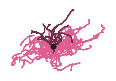

839222460 ephys


805729797
805729797 morph


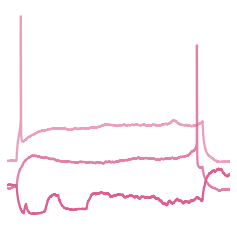

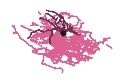

805729797 ephys


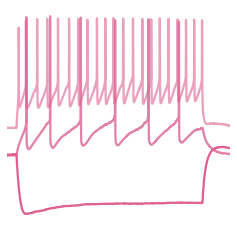

In [42]:
for cell in cells.index:
    print(cell)
    plot.plot_trace_morph(cell, cells, rotate=180, scale_factor=200, scalebar=False)

852671126 ephys


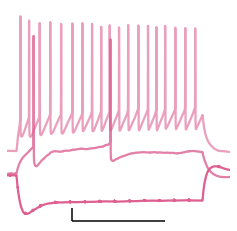

In [43]:
plot.plot_trace_morph(852671126, human_df, rotate=180, scale_factor=100, morph=False, save=True)

839222460 morph


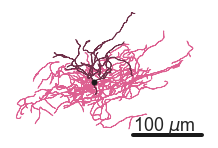

In [33]:
plot.plot_trace_morph(839222460, human_df, rotate=180, scale_factor=100, ephys=False, save=True)

In [44]:
plot.plot_trace_morph(839222460, human_df, rotate=True, scale_factor=100, ephys=False, save=False)

839222460 morph
Error applying affine transform
list index out of range


701071903 morph


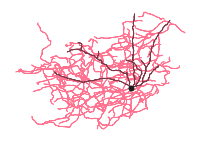

701071903 ephys


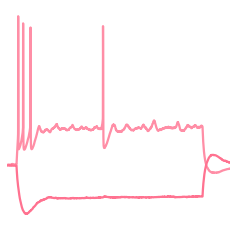

In [136]:
plot.plot_trace_morph(701071903, human_df, rotate=180, scale_factor=100, scalebar=False, save=True)

808902642 morph


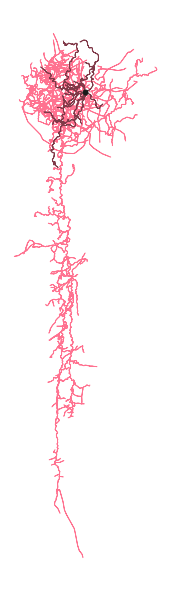

808902642 ephys


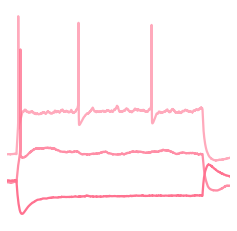

In [135]:
plot.plot_trace_morph(808902642, human_df, rotate=180, scale_factor=100, scalebar=False, save=True)

In [6]:
cells = human_df.loc[lambda df: df['topLeaf'].str.contains('CHRNA4')].sort_values('axon_branch_freq', ascending=False)
cols = ['topLeaf', 'topLeafValue', 'Tree_second_cl', 'Tree_second_bt', 'axon_branch_freq', 'roi', 'collaborator', 'structure']
cells[cols]

,topLeaf,topLeafValue,Tree_second_cl,Tree_second_bt,axon_branch_freq,roi,collaborator,structure
spec_id,,,,,,,,
805729797,Inh L1 SST CHRNA4 (ADARB2+),0.91,Inh L1-2 GAD1 MC4R (ADARB2+),0.09,7.948101,TCx_L1,AIBS,MTG
839222460,Inh L1 SST CHRNA4 (ADARB2+),0.62,Inh L1-2 GAD1 MC4R (ADARB2+),0.38,2.973747,FCx_L1,Huib,MTG
852671126,Inh L1 SST CHRNA4 (ADARB2+),0.67,Inh L1-2 GAD1 MC4R (ADARB2+),0.33,2.654191,TCx_L1,AIBS,ITG
835611255,Inh L1 SST CHRNA4 (ADARB2+),0.92,Inh L1-2 GAD1 MC4R (ADARB2+),0.07,1.535679,TCx_L1,AIBS,ITG


In [26]:
cells = human_df.query("topLeaf.str.contains('MC4R') & axon_extent_y>300", 
                      engine='python')
cols = ['topLeaf', 'topLeafValue', 'layer', 'layer_depth', 'axon_branch_freq', 'roi', 'collaborator', 'structure']
cells[cols]

,topLeaf,topLeafValue,layer,layer_depth,axon_branch_freq,roi,collaborator,structure
spec_id,,,,,,,,
808902642,Inh L1-2 GAD1 MC4R (ADARB2+),0.90,2,2.900698,3.116053,TCx_L1,Huib,SFG
1126880187,Inh L1-2 GAD1 MC4R (ADARB2+),0.88,1,225.302194,3.374774,TCx_LL1,Huib,IFG


In [32]:
human_df.loc[lambda df: df['topLeaf'].str.contains('MC4R'), ['axon_extent_x', 'axon_extent_y']].mean()

axon_extent_x    247.032974
axon_extent_y    271.235593
dtype: float64

## mouse comparison

In [85]:
features = [
           'sag',
           'ir_late_mean',
]
labels = [
    'sag ratio',
    'irregularity ratio',
]

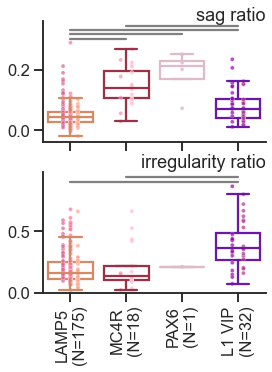

In [88]:
mouse_ephys = mouse_df.query("primary_ephys")
utils.plot_boxplot_multiple(mouse_ephys, features, labels=labels, x='homology_type', figsize=(4,5), 
                            pairs='all', 
                            size=4, label_counts=True,
                            x_fine=cluster, palette_fine=palette_mouse, 
                            palette=palette_subclass, test='dunn')
save_plot_multiple(figdir/"f4_boxplots_mouse_mc4r", ['svg'])

844242654 morph


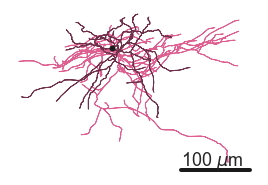

844242654 ephys


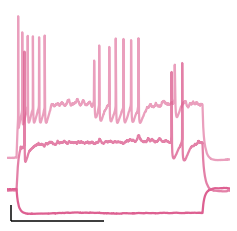

In [143]:
plot.plot_trace_morph(844242654, mouse_df, palette=palette_mouse, rotate=220, scale_factor=100,
                      ephys=True, save=True)

In [142]:
# why the mix-up??
mouse_df.loc[[867017156, 844242654 ], cols]

,name,topLeaf,topLeafValue,roi,peak_ratio_chirp,sag,axon_branch_freq,axon_mean_contraction
spec_id,,,,,,,,
867017156,Ndnf-IRES2-dgCre;Slc32a1-IRES2-FlpO;Ai65-46193...,Lamp5 Fam19a1 Tmem182,1.00,VISp1,NaN,0.215769,2.156886,0.831038
844242654,Ndnf-IRES2-dgCre;Slc32a1-IRES2-FlpO;Ai65-45286...,Lamp5 Ntn1 Npy2r,0.98,VISp1,NaN,0.029584,2.192214,0.851195


In [105]:
cells = mouse_df.query('ir_late_mean>0.4 & homology_type=="MC4R"')
cols = ['name', 'topLeaf', 'topLeafValue', 
        'roi','peak_ratio_chirp', 'sag','axon_branch_freq','axon_mean_contraction']
cells[cols]

,name,topLeaf,topLeafValue,roi,peak_ratio_chirp,sag,axon_branch_freq,axon_mean_contraction
spec_id,,,,,,,,
644941196,Ndnf-IRES2-dgCre;Ai14-355230.06.01.01,Lamp5 Fam19a1 Tmem182,1.00,VISp1,NaN,0.136710,1.746805,0.819845
652959904,Ndnf-IRES2-dgCre;Ai14-363973.05.02.01,Lamp5 Fam19a1 Tmem182,1.00,VISp1,NaN,0.223998,NaN,NaN
888214374,Ndnf-IRES2-dgCre;Ai14-470194.03.02.02,Lamp5 Fam19a1 Tmem182,1.00,VISp1,1.020395,0.094877,NaN,NaN
651167896,Ndnf-IRES2-dgCre;Ai14-361703.05.02.03,Lamp5 Fam19a1 Tmem182,0.52,VISp1,NaN,0.087400,NaN,NaN


In [17]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

644941196 morph


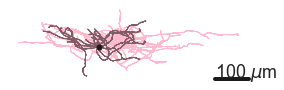

644941196 ephys


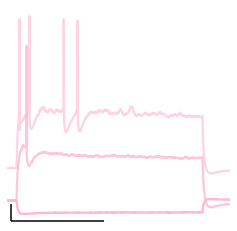

652959904 ephys


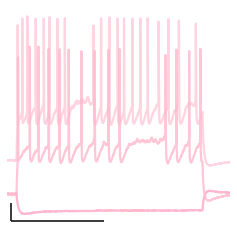

888214374 ephys


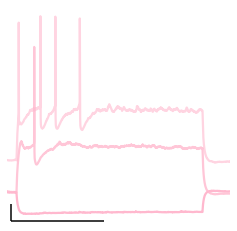

651167896 ephys


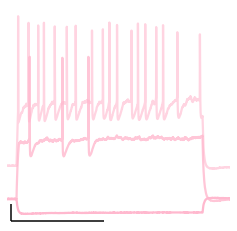

In [94]:
for cell in cells.index:
    plot.plot_trace_morph(cell, cells, palette=palette_mouse, rotate=True, scale_factor=200)

644941196 morph


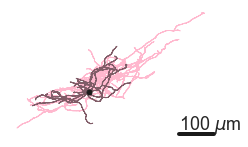

644941196 ephys


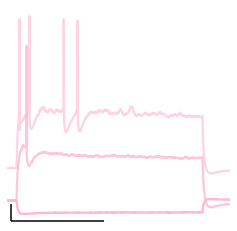

844242654 morph


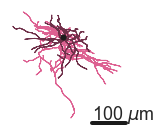

844242654 ephys


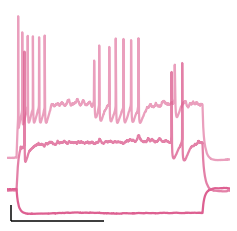

823719680 morph


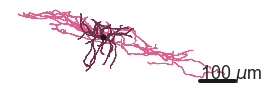

823719680 ephys


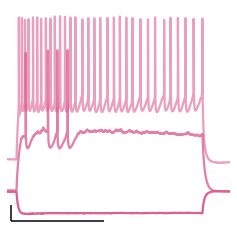

731980846 morph


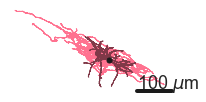

731980846 ephys


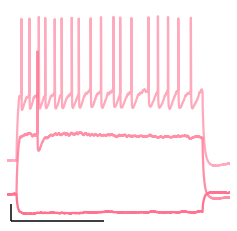

648582997 morph


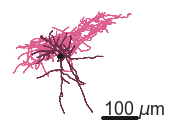

648582997 ephys


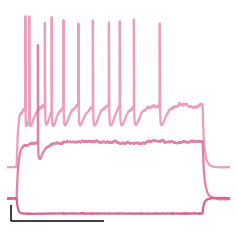

In [134]:
cells = mouse_df.query('ir_late_mean>0.4 & (homology_type=="LAMP5" | homology_type=="MC4R")')

for cell in cells.query('has_morph').index:
    plot.plot_trace_morph(cell, cells, palette=palette_mouse, rotate=180, scale_factor=200)

644941196 morph


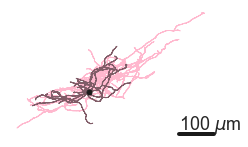

644941196 ephys


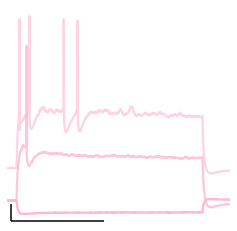

867017156 morph


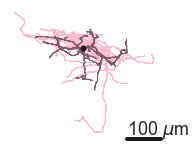

867017156 ephys


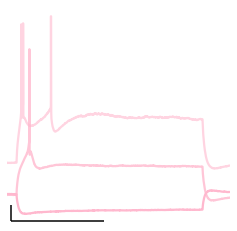

824792964 morph


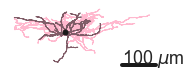

824792964 ephys


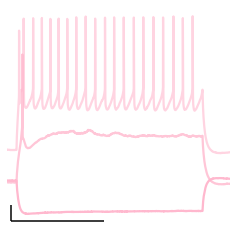

653031656 morph


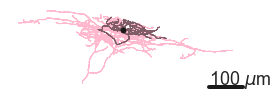

653031656 ephys


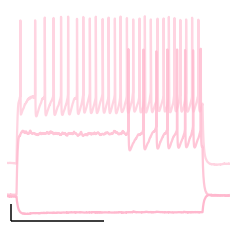

In [112]:
cells = mouse_df.query("topLeaf.str.contains('Tmem')", engine='python')

for cell in cells.query('has_morph').index:
    plot.plot_trace_morph(cell, cells, palette=palette_mouse, rotate=180, scale_factor=200)

### Morpho

(0.0, 5.5)

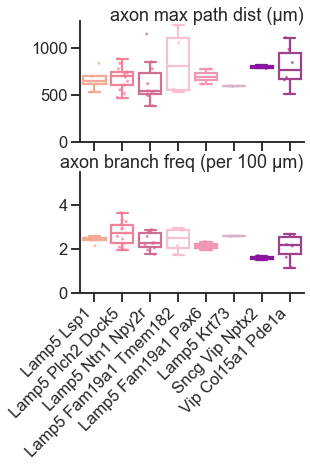

In [99]:
mouse_df['axon_branch_freq'] = mouse_df['axon_num_branches']/mouse_df['axon_total_length']*100
features = [
    'axon_max_path_distance',
    'axon_branch_freq'
]
labels = [
    'axon max path dist (μm)',
    'axon branch freq (per 100 μm)',
]
# labels=features
utils.plot_boxplot_multiple(mouse_df, features, labels=labels, x=cluster, figsize=(4,5), 
                           palette=palette_mouse, label_counts=False)
plt.ylim(0,5.5)

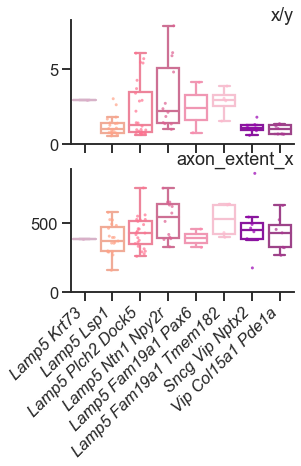

In [31]:
mouse_df['x/y'] = mouse_df['axon_extent_x']/mouse_df['axon_extent_y']
features = [
    'x/y',
    'axon_extent_x',
]
labels=features
utils.plot_boxplot_multiple(mouse_df, features, labels=labels, x=cluster, figsize=(4,5), 
                           palette=palette_mouse, label_counts=False)

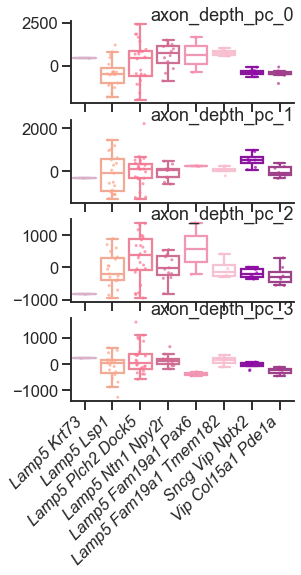

In [34]:

features = [f"axon_depth_pc_{x}" for x in range(4)]
labels=features
utils.plot_boxplot_multiple(mouse_df, features, labels=labels, x=cluster, figsize=(4,7), 
                           palette=palette_mouse, label_counts=False)

/local1/storage/envs/ipfx3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


(1.0, 1.5)

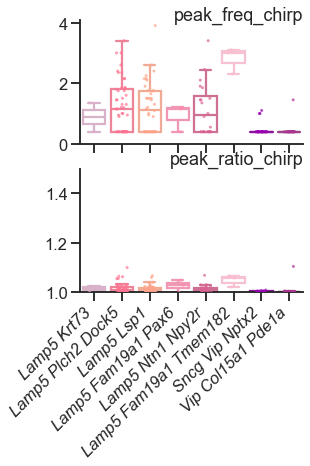

In [40]:
mouse_df['peak_freq_chirp'].loc[lambda x: x>10] = np.nan
mouse_df['peak_ratio_chirp'].loc[lambda x: x>1.20] = np.nan
features = [
    'peak_freq_chirp',
    'peak_ratio_chirp'
]
labels = features
util.plot_boxplot_multiple(mouse_df, features, labels=labels, x=cluster, figsize=(4,5), 
                           palette=palette_mouse, label_counts=False)
plt.ylim(1,1.5)

## Human ephys criteria

In [434]:
cells = human_df.query('isi_cv_hero>0.5 & sag>0.3 & has_morph')
cells

,exp_component_name,batch,cell_name,spec_id.1,donor,collaborator,gender,collection,medical_conditions,postPatch,postPatch_classification,filldate,rigOperator,rigNumber,cell_depth,sliceHealth,patchseq_roi,roi,Class,injection_roi,injection_method,injection_materials,propagation_type,Total_time,Ephys_time,Retraction_time,endPipetteR,rna_amplification_pass_fail,go_no_go_63x,image_series_63x_qc,cell_specimen_project,percent_reads_aligned_total,percent_reads_aligned_to_exons,genes,patch_date,exclude,fpkm_dir,MALAT1_cpm,Depth_from_Pia_microns,total_cortical_depth,L23_cell_depth,L23_total_thickness,virus,recon_cell_overall_state,recon_layer_type,cluster,score,n_marker,res_index,h_score,res_index_pctile,topLeafValue,last_map,last_res,last_score,code_version,ref_version,mapping_version,sample_id,cell_reporter,marker_genes,topLeaf,quality_score,marker_sum_norm,Norm_Marker_Sum.0.4,contaminationType,contam_sum,seurat_cluster,seurat_prediction_score,broad_class,subclass,Tree_first_cl,Tree_second_cl,Tree_third_cl,Tree_first_bt,Tree_second_bt,Tree_third_bt,Tree_first_KL,Tree_second_KL,Tree_third_KL,Tree_first_cor,Tree_second_cor,Tree_third_cor,Tree_call,Old_call,leaf_matched_seurat,leaf_mapped,L23_depth_normalized,name,created_at,normalized_depth_lims,soma_depth_um,structure,donor_name,dendrite_type,layer_lims,project_code,err_id,nwb_path,swc_path,...,peak_v_adapt_ratio,threshold_v_adapt_ratio,fast_trough_v_adapt_ratio,ahp_delay_ratio_5spike,trough_deltav_rheo,trough_deltav_hero,fast_trough_deltav_rheo,fast_trough_deltav_hero,peak_deltav_rheo,peak_deltav_hero,first_isi_inv_hero,upstroke_downstroke_ratio_short_square,threshold_v_short_square,width_short_square,upstroke_short_square,downstroke_short_square,fast_trough_deltav_short_square,peak_deltav_short_square,postap_slope_ramp,width_suprathresh_short_square,postap_slope_short_square,sag_area,postap_slope_rheo,isi_norm_sq_var_hero,postap_slope_hero,sag_area_depol,isi_norm_sq_var_mean,adapt_max,isi_cv_max,isi_norm_sq_var_max,trough_slowdeltav_rheo,trough_slowdeltav_hero,first_isi_inv_rheo,sag_tau,image_series_id,errors,layer_depth,layer_thickness,normalized_layer_depth,normalized_depth,absolute_depth,cortex_thickness,wm_distance,layer,axon_bias_x,axon_bias_y,axon_contraction_none,axon_extent_x,axon_extent_y,axon_max_branch_order_none,axon_max_euclidean_distance_none,axon_max_path_distance_none,axon_num_branches_none,axon_pct_above_basal_dendrite_none,axon_pct_below_basal_dendrite_none,axon_pct_intersect_basal_dendrite_none,axon_soma_percentile_x,axon_soma_percentile_y,axon_total_length_none,axon_total_surface_none,axon_total_volume_none,basal_dendrite_bias_x,basal_dendrite_bias_y,basal_dendrite_contraction_none,axon_emd_with_basal_dendrite_none,basal_dendrite_extent_x,basal_dendrite_extent_y,basal_dendrite_max_branch_order_none,basal_dendrite_max_euclidean_distance_none,basal_dendrite_max_path_distance_none,basal_dendrite_num_branches_none,basal_dendrite_num_stems_none,basal_dendrite_pct_above_axon_none,basal_dendrite_pct_below_axon_none,basal_dendrite_pct_intersect_axon_none,basal_dendrite_soma_percentile_x,basal_dendrite_soma_percentile_y,basal_dendrite_soma_surface_none,basal_dendrite_total_length_none,basal_dendrite_total_surface_none,basal_dendrite_total_volume_none,axon_over_basal_dendrite_extent_x,axon_over_basal_dendrite_extent_y,axon_extent_x_over_y,basal_dendrite_extent_x_over_y,axon_over_basal_dendrite_ratio_xy,normalized_soma_depth,soma_radius_none,basal_dendrite_stem_exit_down,basal_dendrite_stem_exit_side_less,basal_dendrite_stem_exit_side_more,basal_dendrite_stem_exit_up,axon_soma_theta_none,axon_soma_distance_none,axon_hist_pc_0_none,axon_hist_pc_1_none,axon_hist_pc_2_none,axon_hist_pc_3_none,axon_hist_pc_4_none,adp_deltav
spec_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
768893737,SM-GE5UQ_S190_E1-50,RSC-184,H18.06.367.1

In [435]:
cells = human_df.query('isi_cv_hero>0.5 & sag>0.3 & collaborator=="AIBS"')
cells

,exp_component_name,batch,cell_name,spec_id.1,donor,collaborator,gender,collection,medical_conditions,postPatch,postPatch_classification,filldate,rigOperator,rigNumber,cell_depth,sliceHealth,patchseq_roi,roi,Class,injection_roi,injection_method,injection_materials,propagation_type,Total_time,Ephys_time,Retraction_time,endPipetteR,rna_amplification_pass_fail,go_no_go_63x,image_series_63x_qc,cell_specimen_project,percent_reads_aligned_total,percent_reads_aligned_to_exons,genes,patch_date,exclude,fpkm_dir,MALAT1_cpm,Depth_from_Pia_microns,total_cortical_depth,L23_cell_depth,L23_total_thickness,virus,recon_cell_overall_state,recon_layer_type,cluster,score,n_marker,res_index,h_score,res_index_pctile,topLeafValue,last_map,last_res,last_score,code_version,ref_version,mapping_version,sample_id,cell_reporter,marker_genes,topLeaf,quality_score,marker_sum_norm,Norm_Marker_Sum.0.4,contaminationType,contam_sum,seurat_cluster,seurat_prediction_score,broad_class,subclass,Tree_first_cl,Tree_second_cl,Tree_third_cl,Tree_first_bt,Tree_second_bt,Tree_third_bt,Tree_first_KL,Tree_second_KL,Tree_third_KL,Tree_first_cor,Tree_second_cor,Tree_third_cor,Tree_call,Old_call,leaf_matched_seurat,leaf_mapped,L23_depth_normalized,name,created_at,normalized_depth_lims,soma_depth_um,structure,donor_name,dendrite_type,layer_lims,project_code,err_id,nwb_path,swc_path,...,peak_v_adapt_ratio,threshold_v_adapt_ratio,fast_trough_v_adapt_ratio,ahp_delay_ratio_5spike,trough_deltav_rheo,trough_deltav_hero,fast_trough_deltav_rheo,fast_trough_deltav_hero,peak_deltav_rheo,peak_deltav_hero,first_isi_inv_hero,upstroke_downstroke_ratio_short_square,threshold_v_short_square,width_short_square,upstroke_short_square,downstroke_short_square,fast_trough_deltav_short_square,peak_deltav_short_square,postap_slope_ramp,width_suprathresh_short_square,postap_slope_short_square,sag_area,postap_slope_rheo,isi_norm_sq_var_hero,postap_slope_hero,sag_area_depol,isi_norm_sq_var_mean,adapt_max,isi_cv_max,isi_norm_sq_var_max,trough_slowdeltav_rheo,trough_slowdeltav_hero,first_isi_inv_rheo,sag_tau,image_series_id,errors,layer_depth,layer_thickness,normalized_layer_depth,normalized_depth,absolute_depth,cortex_thickness,wm_distance,layer,axon_bias_x,axon_bias_y,axon_contraction_none,axon_extent_x,axon_extent_y,axon_max_branch_order_none,axon_max_euclidean_distance_none,axon_max_path_distance_none,axon_num_branches_none,axon_pct_above_basal_dendrite_none,axon_pct_below_basal_dendrite_none,axon_pct_intersect_basal_dendrite_none,axon_soma_percentile_x,axon_soma_percentile_y,axon_total_length_none,axon_total_surface_none,axon_total_volume_none,basal_dendrite_bias_x,basal_dendrite_bias_y,basal_dendrite_contraction_none,axon_emd_with_basal_dendrite_none,basal_dendrite_extent_x,basal_dendrite_extent_y,basal_dendrite_max_branch_order_none,basal_dendrite_max_euclidean_distance_none,basal_dendrite_max_path_distance_none,basal_dendrite_num_branches_none,basal_dendrite_num_stems_none,basal_dendrite_pct_above_axon_none,basal_dendrite_pct_below_axon_none,basal_dendrite_pct_intersect_axon_none,basal_dendrite_soma_percentile_x,basal_dendrite_soma_percentile_y,basal_dendrite_soma_surface_none,basal_dendrite_total_length_none,basal_dendrite_total_surface_none,basal_dendrite_total_volume_none,axon_over_basal_dendrite_extent_x,axon_over_basal_dendrite_extent_y,axon_extent_x_over_y,basal_dendrite_extent_x_over_y,axon_over_basal_dendrite_ratio_xy,normalized_soma_depth,soma_radius_none,basal_dendrite_stem_exit_down,basal_dendrite_stem_exit_side_less,basal_dendrite_stem_exit_side_more,basal_dendrite_stem_exit_up,axon_soma_theta_none,axon_soma_distance_none,axon_hist_pc_0_none,axon_hist_pc_1_none,axon_hist_pc_2_none,axon_hist_pc_3_none,axon_hist_pc_4_none,adp_deltav
spec_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
689300362,SM-GE92Y_S032_E1-50,RSC-156,H18.03.009.1

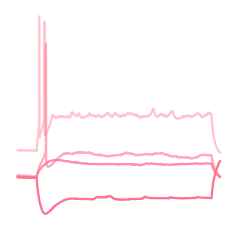

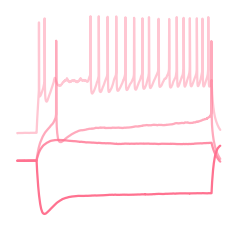

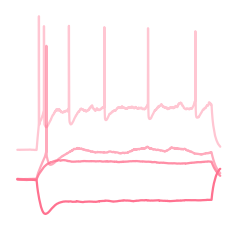

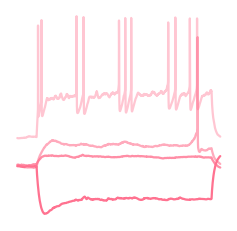

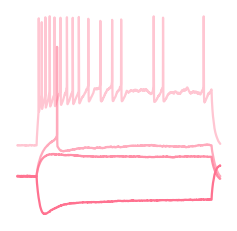

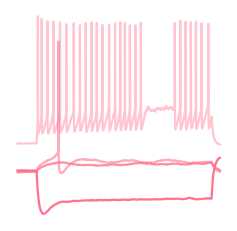

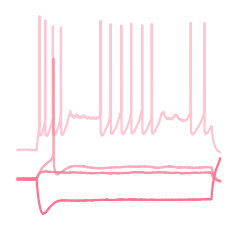

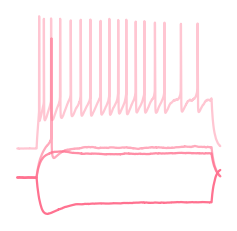

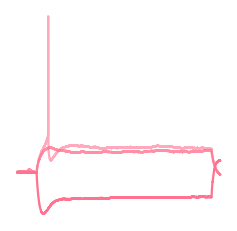

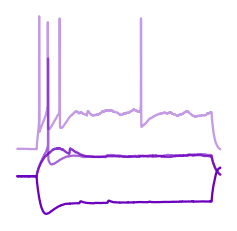

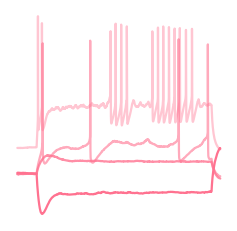

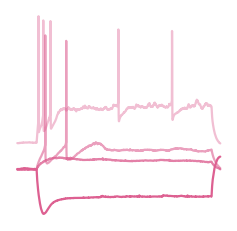

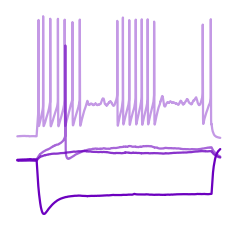

In [433]:
for cell in cells.index:
    dataset, sweeps = ps.get_dataset_sweeps(cell, lims_sweep_info=True, qc_sweeps=True, sweeps_query=None)
    ps.plot_sweep_panel(dataset, sweeps, color=palette_human[cells.loc[cell, cluster]])

Mouse cells with both are just a small subset of VIPs that don't seem to truly stutter

/home/tom.chartrand/work/ateam-tools/ateam/data/lims.py:266: UserWarning: No results found in LIMS.
  warnings.warn("No results found in LIMS.")


expected str, bytes or os.PathLike object, not NoneType


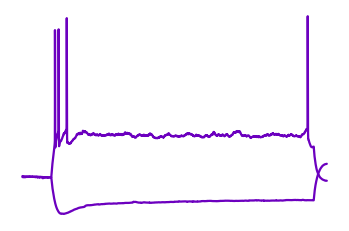

/home/tom.chartrand/work/ateam-tools/ateam/data/lims.py:266: UserWarning: No results found in LIMS.
  warnings.warn("No results found in LIMS.")


expected str, bytes or os.PathLike object, not NoneType


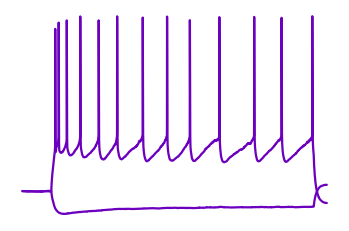

/home/tom.chartrand/work/ateam-tools/ateam/data/lims.py:266: UserWarning: No results found in LIMS.
  warnings.warn("No results found in LIMS.")


expected str, bytes or os.PathLike object, not NoneType


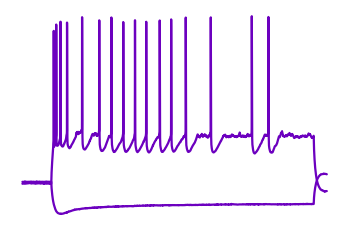

In [441]:
cells = mouse_df.query('isi_cv_hero>0.5 & sag>0.3')
# mouse: all Sncg Vip Itih5
for cell in cells.index:
#     dataset, sweeps = ps.get_dataset_sweeps(cell, lims_sweep_info=True, qc_sweeps=True, sweeps_query=None)
#     ps.plot_sweep_panel(dataset, sweeps, color=palette_mouse[cells.loc[cell, cluster]])
    plot_trace_morph_mouse(cell, rotate=180, scale_factor=200)

701223121


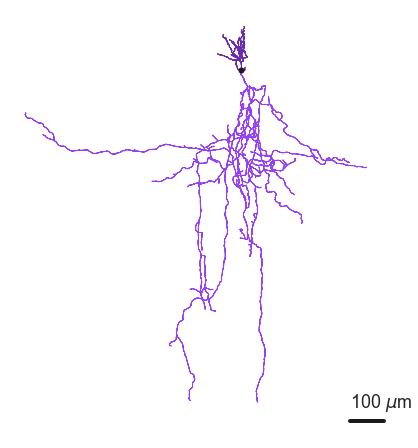

/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: SSFINESTprobing
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: LSCOARSE
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: LSFINEST
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: CAPCHK
  warnings.warn("Could not find stimulus: %s" % tag)


<Figure size 432x288 with 0 Axes>

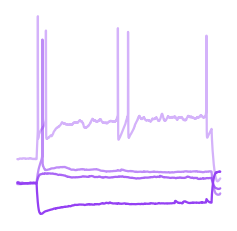

768893737


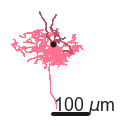

<Figure size 432x288 with 0 Axes>

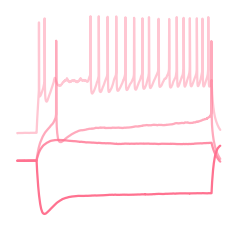

1005083233


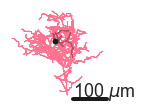

<Figure size 432x288 with 0 Axes>

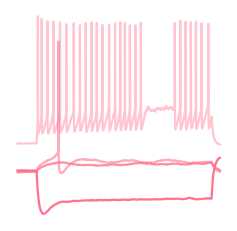

1005131537


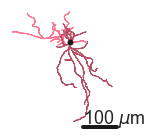

<Figure size 432x288 with 0 Axes>

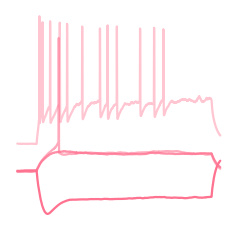

In [427]:
for cell in cells.index:
    print(cell)
    plot_trace_morph(cell, rotate=180, scale_factor=200)